# Hierarchical Clustering

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
student_por = pd.read_csv('student-por.csv',sep=';')
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [3]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

 ## Dendrogram

In [6]:
import scipy.cluster.hierarchy as sch
from sklearn .cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import sklearn.metrics as sm

In [7]:
numerical = student_por.select_dtypes(include=['int64','float64'])
newstudent_numeric = numerical.drop(columns=['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health'])
newstudent_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       649 non-null    int64
 1   failures  649 non-null    int64
 2   absences  649 non-null    int64
 3   G1        649 non-null    int64
 4   G2        649 non-null    int64
 5   G3        649 non-null    int64
dtypes: int64(6)
memory usage: 30.5 KB


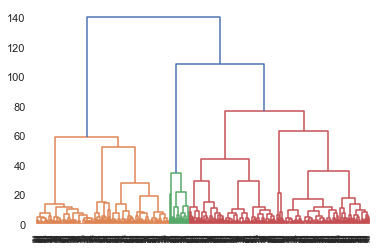

In [8]:
dendrogram = sch.dendrogram(sch.linkage(newstudent_numeric,method='ward'))


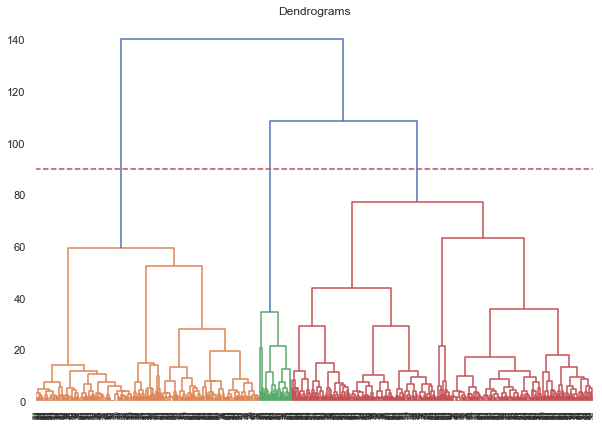

In [9]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(newstudent_numeric,method='ward'))
plt.axhline(y=90,color='r',linestyle='--')

### 3 obvious clusters can be seen

## Breakdown of which data belongs to which cluster

In [10]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(newstudent_numeric)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0,
       2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 2,
       0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [11]:
newstudent_numeric['cluster'] = cluster.fit_predict(newstudent_numeric)
newstudent_numeric['cluster'].value_counts()

0    350
1    261
2     38
Name: cluster, dtype: int64

In [12]:
cluster1 = newstudent_numeric[newstudent_numeric['cluster']==0]
cluster2 = newstudent_numeric[newstudent_numeric['cluster']==1]
cluster3 = newstudent_numeric[newstudent_numeric['cluster']==2]

## Cluster 1 Distribution

In [13]:
cluster1.describe()

,age,failures,absences,G1,G2,G3,cluster
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0
mean,16.754286,0.345714,3.585714,9.737143,9.871429,10.071429,0.0
std,1.287886,0.728402,3.210356,1.956414,2.222066,2.734275,0.0
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.000000,0.000000,0.000000,9.000000,9.000000,9.000000,0.0
50%,17.000000,0.000000,4.000000,10.000000,10.000000,11.000000,0.0
75%,18.000000,0.000000,6.000000,11.000000,11.000000,11.000000,0.0
max,22.000000,3.000000,12.000000,14.000000,14.000000,15.000000,0.0


## Cluster 2 Distribution

In [14]:
cluster2.describe()

,age,failures,absences,G1,G2,G3,cluster
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.0
mean,16.639847,0.019157,1.865900,13.839080,14.057471,14.586207,1.0
std,1.078007,0.162956,2.893166,1.766397,1.907614,1.815860,0.0
min,15.000000,0.000000,0.000000,10.000000,10.000000,10.000000,1.0
25%,16.000000,0.000000,0.000000,13.000000,13.000000,13.000000,1.0
50%,17.000000,0.000000,0.000000,14.000000,14.000000,14.000000,1.0
75%,17.000000,0.000000,2.000000,15.000000,15.000000,16.000000,1.0
max,20.000000,2.000000,14.000000,19.000000,19.000000,19.000000,1.0


## Cluster 3 Distribution

In [15]:
cluster3.describe()

,age,failures,absences,G1,G2,G3,cluster
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,17.368421,0.473684,16.657895,9.947368,10.131579,10.394737,2.0
std,1.303240,0.687213,4.987966,1.916463,1.862446,2.060431,0.0
min,15.000000,0.000000,10.000000,7.000000,7.000000,6.000000,2.0
25%,17.000000,0.000000,14.000000,9.000000,9.000000,9.250000,2.0
50%,17.000000,0.000000,16.000000,10.000000,10.000000,10.000000,2.0
75%,18.000000,1.000000,18.000000,11.000000,11.000000,11.750000,2.0
max,21.000000,3.000000,32.000000,14.000000,15.000000,16.000000,2.0


In [16]:
350+261+38

649

In [17]:
student_por['cluster'] = cluster.fit_predict(newstudent_numeric)
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,0.519260
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,0.606051
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,2.000000


In [18]:
cluster1 = student_por[student_por['cluster']==0]
cluster2 = student_por[student_por['cluster']==1]
cluster3 = student_por[student_por['cluster']==2]

In [19]:
cluster1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0
mean,16.754286,2.311429,2.140000,1.651429,1.788571,0.345714,3.885714,3.240000,3.274286,1.594286,2.425714,3.642857,3.585714,9.737143,9.871429,10.071429,0.0
std,1.287886,1.119064,1.062705,0.793011,0.850340,0.728402,1.006325,1.086304,1.208457,1.010530,1.351608,1.432690,3.210356,1.956414,2.222066,2.734275,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,9.000000,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,10.000000,10.000000,11.000000,0.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,4.000000,5.000000,6.000000,11.000000,11.000000,11.000000,0.0
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,14.000000,14.000000,15.000000,0.0


In [20]:
cluster2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.0
mean,16.639847,2.808429,2.513410,1.452107,2.160920,0.019157,4.022989,3.099617,3.038314,1.287356,2.015326,3.386973,1.865900,13.839080,14.057471,14.586207,1.0
std,1.078007,1.113590,1.121817,0.669820,0.777673,0.162956,0.836343,0.987246,1.105262,0.654712,1.119647,1.459604,2.893166,1.766397,1.907614,1.815860,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,10.000000,10.000000,10.000000,1.0
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,13.000000,13.000000,13.000000,1.0
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,14.000000,14.000000,14.000000,1.0
75%,17.000000,4.000000,4.000000,2.000000,3.000000,0.000000,5.000000,4.000000,4.000000,1.000000,3.000000,5.000000,2.000000,15.000000,15.000000,16.000000,1.0
max,20.000000,4.000000,4.000000,4.000000,4.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,14.000000,19.000000,19.000000,19.000000,1.0


In [21]:
cluster3.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,17.368421,2.368421,2.421053,1.605263,1.657895,0.473684,3.710526,3.184211,3.368421,2.131579,2.763158,3.578947,16.657895,9.947368,10.131579,10.394737,2.0
std,1.303240,0.997864,1.056040,0.754786,0.582461,0.687213,1.183396,1.135550,1.261082,1.234001,1.383966,1.426233,4.987966,1.916463,1.862446,2.060431,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,7.000000,7.000000,6.000000,2.0
25%,17.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,14.000000,9.000000,9.000000,9.250000,2.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.500000,2.000000,3.000000,4.000000,16.000000,10.000000,10.000000,10.000000,2.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,4.750000,4.000000,4.000000,3.000000,4.000000,5.000000,18.000000,11.000000,11.000000,11.750000,2.0
max,21.000000,4.000000,4.000000,4.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,14.000000,15.000000,16.000000,2.0


In [22]:
cluster1.shape

(350, 34)

In [23]:
cluster2.shape

(261, 34)

In [24]:
cluster3.shape

(38, 34)

In [25]:
student_por['cluster'] = student_por['cluster'].astype(object)

In [26]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [27]:
def checkpercent(columnname):
    frame = pd.crosstab(index=columnname, columns='count')
    #health = health['count']
    frame['index'] = frame.index
    total = sum(frame['count'])
    percentages = []
    for i in (frame.index):
        percentages.append(frame['count'][i]/total*100)
    frame['percent'] = percentages
    print(frame)

## Percentages of different clusters

In [28]:
for i in student_por:
    #if(student_por[i]):
    print(i)
    checkpercent(cluster1[i])
    checkpercent(cluster2[i])
    checkpercent(cluster3[i])
    print()
    print()
    print()

school
col_0   count index  percent
school                      
GP        189    GP     54.0
MS        161    MS     46.0
col_0   count index    percent
school                        
GP        198    GP  75.862069
MS         63    MS  24.137931
col_0   count index    percent
school                        
GP         36    GP  94.736842
MS          2    MS   5.263158



sex
col_0  count index    percent
sex                          
F        186     F  53.142857
M        164     M  46.857143
col_0  count index    percent
sex                          
F        175     F  67.049808
M         86     M  32.950192
col_0  count index    percent
sex                          
F         22     F  57.894737
M         16     M  42.105263



age
col_0  count  index    percent
age                           
15        67     15  19.142857
16        92     16  26.285714
17        89     17  25.428571
18        72     18  20.571429
19        25     19   7.142857
20         3     20   0.857143
21     

3             1      3   2.631579



schoolsup
col_0      count index    percent
schoolsup                        
no           309    no  88.285714
yes           41   yes  11.714286
col_0      count index    percent
schoolsup                        
no           238    no  91.187739
yes           23   yes   8.812261
col_0      count index    percent
schoolsup                        
no            34    no  89.473684
yes            4   yes  10.526316



famsup
col_0   count index    percent
famsup                        
no        135    no  38.571429
yes       215   yes  61.428571
col_0   count index   percent
famsup                       
no        102    no  39.08046
yes       159   yes  60.91954
col_0   count index    percent
famsup                        
no         14    no  36.842105
yes        24   yes  63.157895



paid
col_0  count index    percent
paid                         
no       323    no  92.285714
yes       27   yes   7.714286
col_0  count index    percent
paid     

col_0  count  index    percent
G2                            
0          7      0   2.000000
5          3      5   0.857143
6          7      6   2.000000
7         13      7   3.714286
8         35      8  10.000000
9         65      9  18.571429
10        76     10  21.714286
11        81     11  23.142857
12        34     12   9.714286
13        23     13   6.571429
14         6     14   1.714286
col_0  count  index    percent
G2                            
10         2     10   0.766284
11        11     11   4.214559
12        49     12  18.773946
13        54     13  20.689655
14        48     14  18.390805
15        37     15  14.176245
16        25     16   9.578544
17        20     17   7.662835
18        14     18   5.363985
19         1     19   0.383142
col_0  count  index    percent
G2                            
7          3      7   7.894737
8          5      8  13.157895
9          7      9  18.421053
10         5     10  13.157895
11        11     11  28.947368
12      

In [29]:
def percent(columnname):
    df = pd.DataFrame()
    frame = pd.crosstab(index=columnname, columns='count')
    #health = health['count']
    frame['index'] = frame.index
    total = sum(frame['count'])
    percentages = []
    for i in (frame.index):
        percentages.append(frame['count'][i]/total*100)
    frame['percent'] = percentages
    df['Variables'] = frame['index']
    df['Percentages'] = frame['percent']
    return df

In [30]:
def plot (varname):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    axs[0].set_ylim([0,100])
    axs[1].set_ylim([0,100])
    axs[2].set_ylim([0,100])
    newdf1 = percent(cluster1[varname])
    newdf2 = percent(cluster2[varname])
    newdf3 = percent(cluster3[varname])
    axs[0].set_xlim([1,len(newdf1.iloc[:,0].value_counts())])
    axs[1].set_xlim([1,len(newdf2.iloc[:,0].value_counts())])
    axs[2].set_xlim([1,len(newdf3.iloc[:,0].value_counts())])
    axs[0].set_title('Cluster 1 - {size} entries'.format(size = len(cluster1)))
    axs[1].set_title('Cluster 2 - {size} entries'.format(size = len(cluster2)))
    axs[2].set_title('Cluster 3 - {size} entries'.format(size = len(cluster3)))
    newdf1[['Percentages']].plot(ax=axs[0], kind='bar')
    newdf2[['Percentages']].plot(ax=axs[1], kind='bar')
    newdf3[['Percentages']].plot(ax=axs[2], kind='bar')

## Plots that show the prominent variable based on the percentage

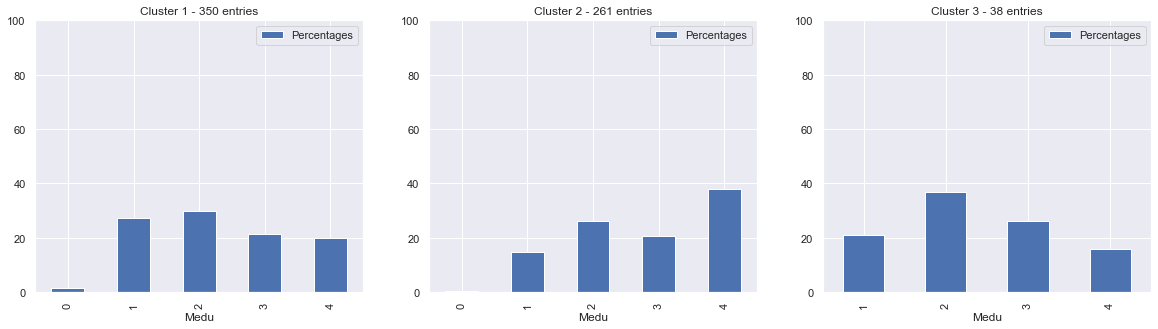

In [31]:
plot('Medu')

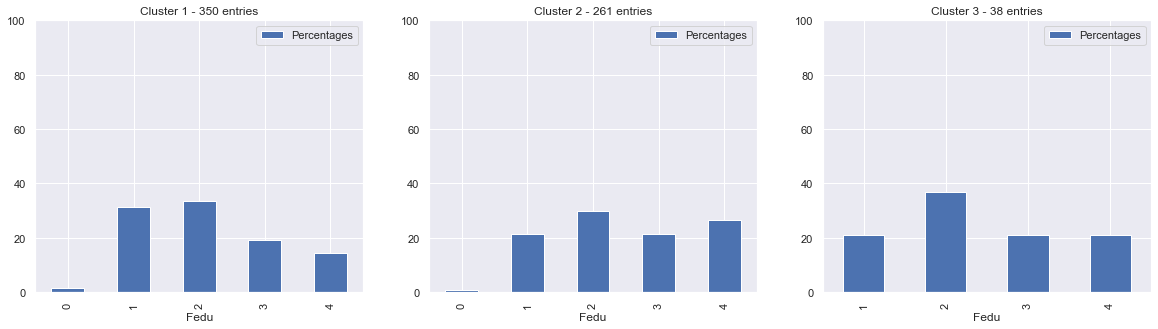

In [32]:
plot('Fedu')

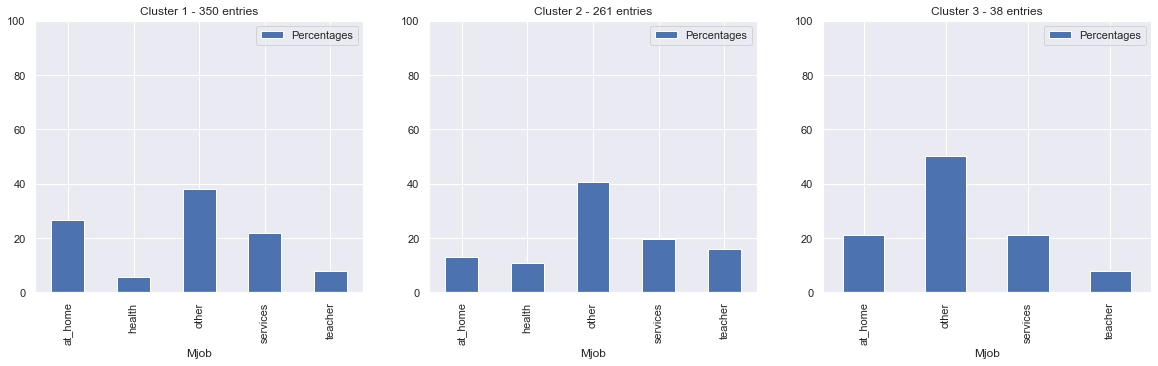

In [33]:
plot('Mjob')

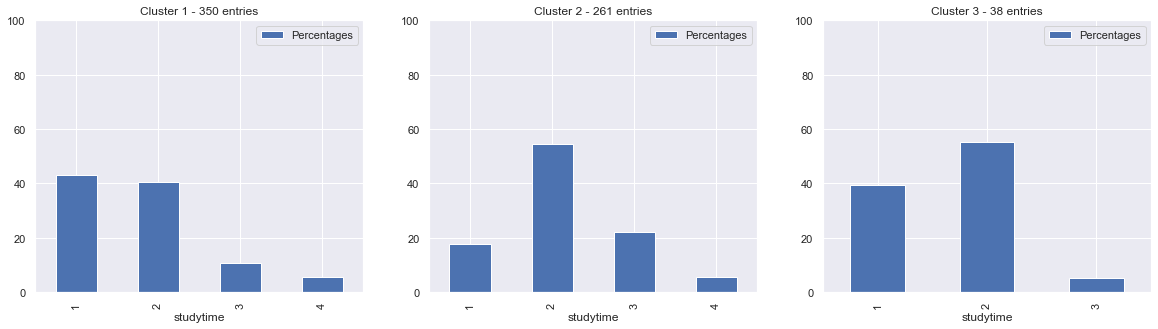

In [34]:
plot('studytime')

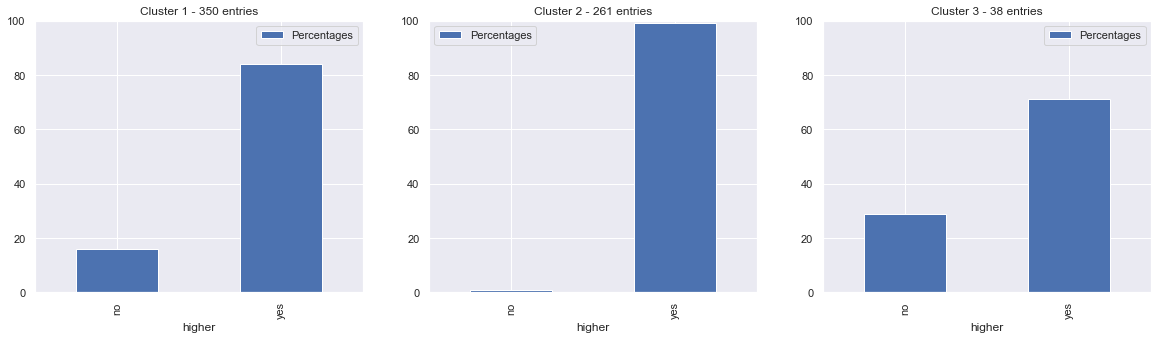

In [35]:
plot('higher')

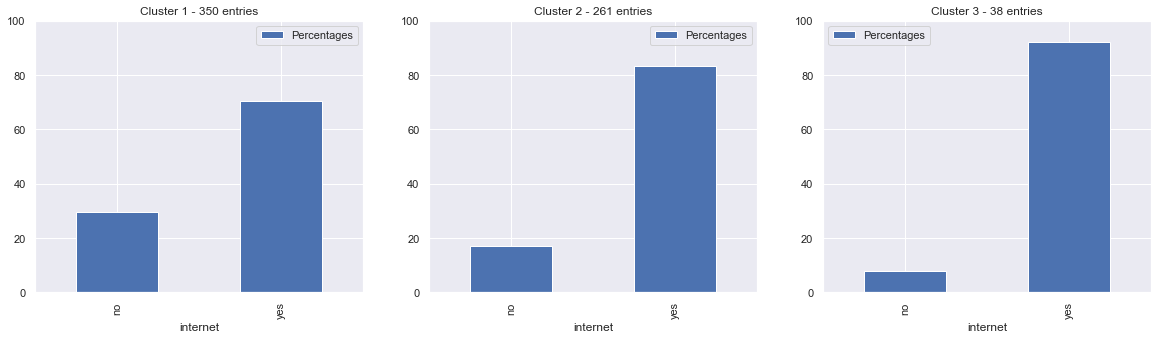

In [36]:
plot('internet')

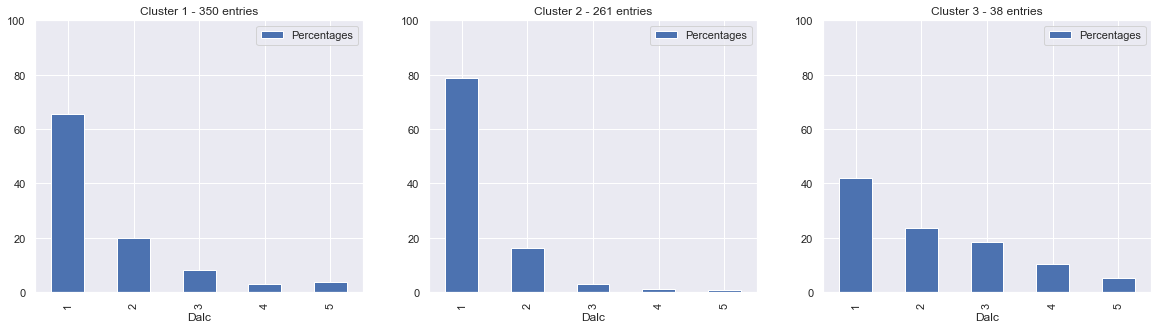

In [37]:
plot('Dalc')

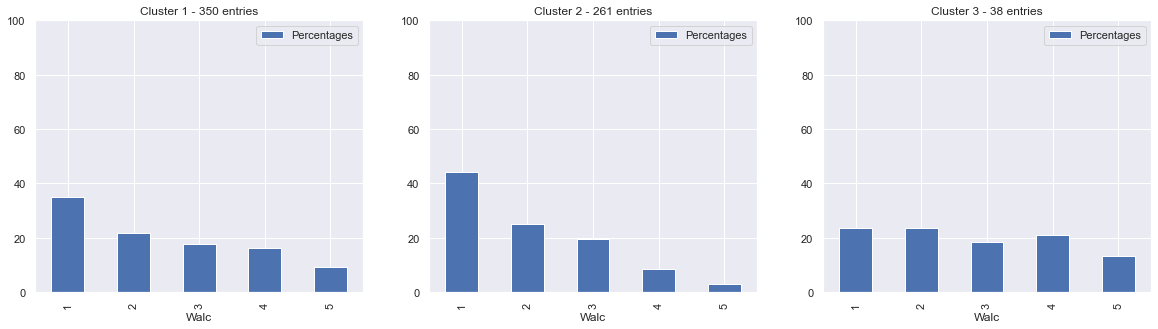

In [38]:
plot('Walc')

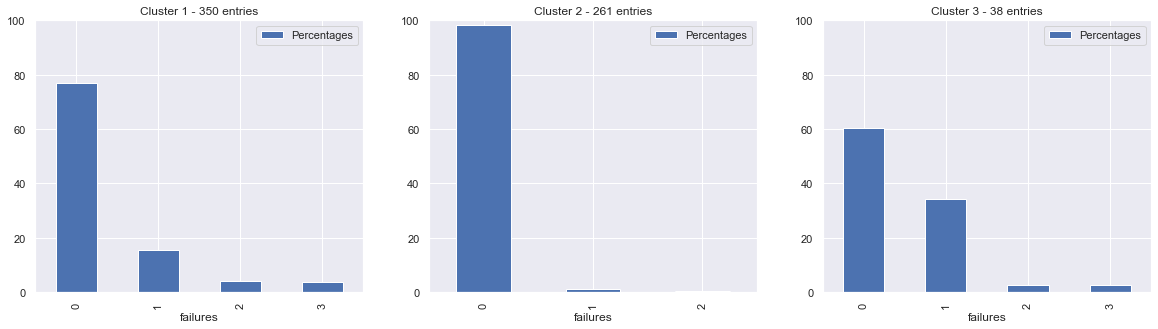

In [39]:
plot('failures')

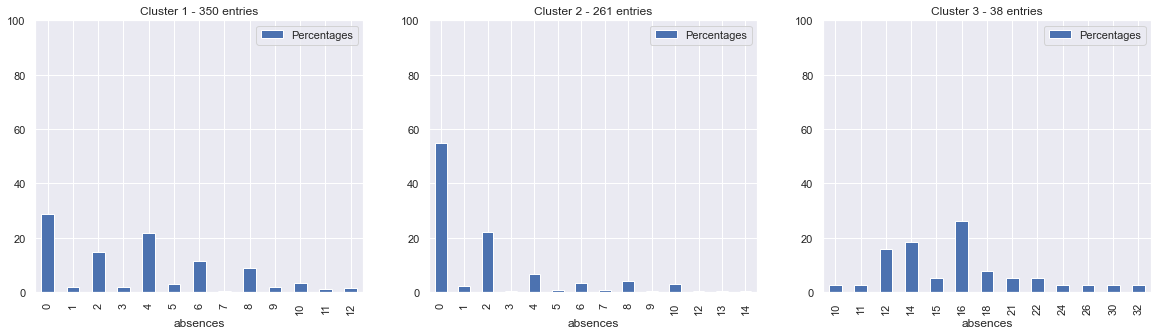

In [40]:
plot('absences')

## Cluster Shape

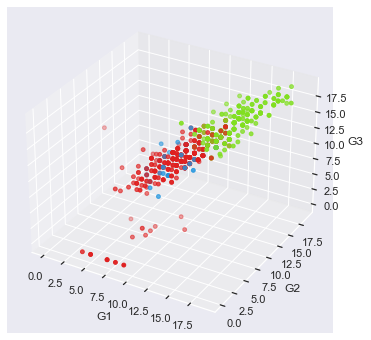

In [41]:
colors = ['#DF2020', '#81DF20', '#2095DF'] #Red, green, blue
student_por['c'] = student_por.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(student_por.G1, student_por.G2, student_por.G3, c=student_por.c, s=15)
ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3')
plt.show()

## As seen from plot above

Red has a cluster size of 350  
Green has a cluster of 261  
Blue has a cluster of 38  
Red has the smallest mean score for G1 to G3  
Green has the highest mean score for G1 to G3  
Blue is mainly the outliers that cannot be placed in red or green  